# ***Loading libraraies and data***

In [0]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [0]:
Train_data = pd.read_csv('/content/drive/My Drive/Tianchi/used_car_train_20200313.csv', sep = ' ')
Test_data = pd.read_csv('/content/drive/My Drive/Tianchi/used_car_testA_20200313.csv', sep = ' ')

In [3]:
Train_data.head()

SaleID    name   regDate  model  ...      v_11      v_12      v_13      v_14
0       0     736  20040402   30.0  ...  2.804097 -2.420821  0.795292  0.914762
1       1    2262  20030301   40.0  ...  2.096338 -1.030483 -1.722674  0.245522
2       2   14874  20040403  115.0  ...  1.803559  1.565330 -0.832687 -0.229963
3       3   71865  19960908  109.0  ...  1.285940 -0.501868 -2.438353 -0.478699
4       4  111080  20120103  110.0  ...  0.910783  0.931110  2.834518  1.923482

[5 rows x 31 columns]

In [4]:
Test_data.head()

SaleID    name   regDate  model  ...      v_11      v_12      v_13      v_14
0  150000   66932  20111212  222.0  ... -0.854626  4.800151  0.620011 -3.664654
1  150001  174960  19990211   19.0  ... -0.729039 -3.796107 -1.541230 -0.757055
2  150002    5356  20090304   82.0  ...  1.001106  0.826562  0.138226  0.754033
3  150003   50688  20100405    0.0  ...  0.505493  1.870379  0.366038  1.312775
4  150004  161428  19970703   26.0  ... -0.673236 -3.197685 -0.025678 -0.101290

[5 rows x 30 columns]

In [42]:
import pandas_profiling as pp
pic = pp.ProfileReport(Train_data)
pic.to_file('/content/sample_data/data.html')

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [5]:
print(Train_data.shape, Test_data.shape)

(150000, 31) (50000, 30)


# ***Anomaly Detection***

In [6]:
print(Train_data.isnull().sum(),
      '\n'*2,
      Test_data.isnull().sum())

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64 

 SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1413
fuelType             2

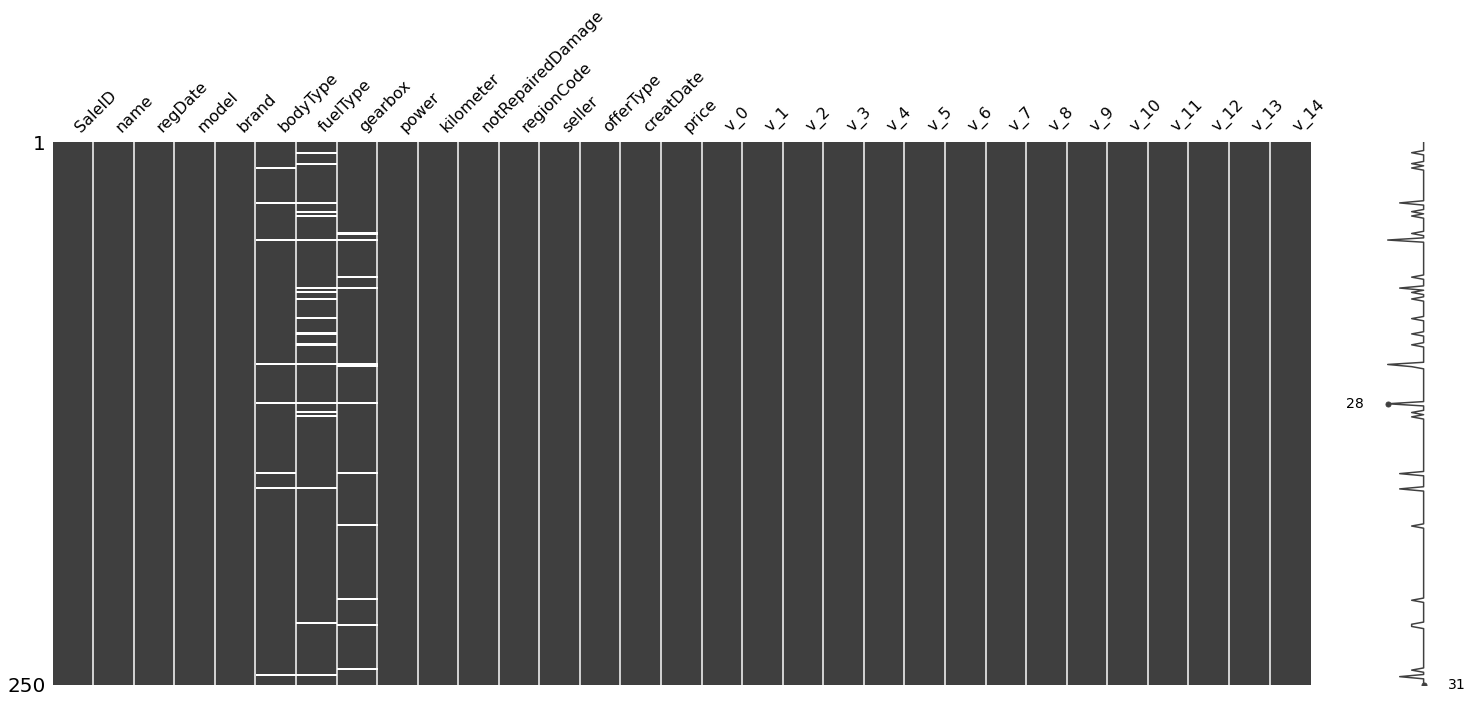

In [7]:
msno.matrix(Train_data.sample(250))

In [8]:
print(Train_data.info(),
      Test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

In [9]:
Train_data['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

In [0]:
Train_data['notRepairedDamage'].replace('-', np.nan, inplace = True)
Test_data['notRepairedDamage'].replace('-', np.nan, inplace = True)

In [11]:
print(Train_data['offerType'].value_counts(),
      '\n',
      Test_data['offerType'].value_counts())

0    150000
Name: offerType, dtype: int64 
 0    50000
Name: offerType, dtype: int64


In [0]:
del Train_data["seller"]
del Train_data["offerType"]
del Test_data["seller"]
del Test_data["offerType"]

# ***The distribution of the data***

In [13]:
Train_data['price'].head(10)

0    1850
1    3600
2    6222
3    2400
4    5200
5    8000
6    3500
7    1000
8    2850
9     650
Name: price, dtype: int64

## ***Overall and price distribution***

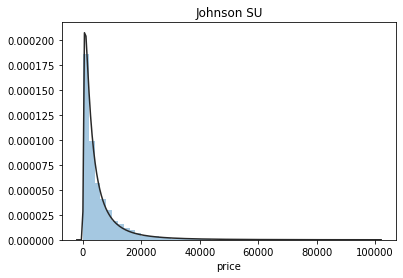

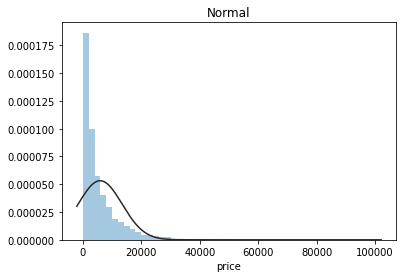

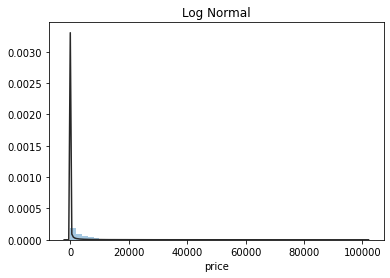

In [14]:
import scipy.stats as st
y = Train_data['price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit = st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit = st.lognorm)

Not normal distribution for price

Skewness: 3.346487
Kurtosis: 18.995183


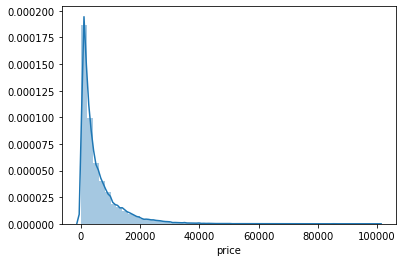

In [15]:
sns.distplot(Train_data['price'])
print("Skewness: %f" % Train_data['price'].skew())
print("Kurtosis: %f" % Train_data['price'].kurt())

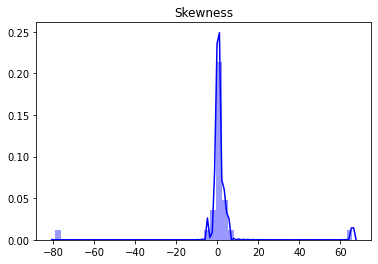

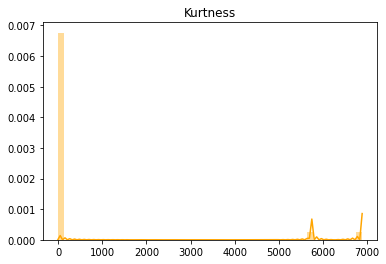

In [16]:
plt.figure(1); plt.title('Skewness')
sns.distplot(Train_data.skew(),color='blue')
plt.figure(2); plt.title('Kurtness')
sns.distplot(Train_data.kurt(),color='orange')

## ***Frequency of price***

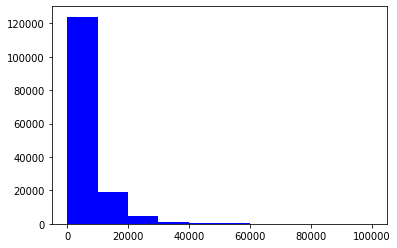

In [17]:
plt.hist(Train_data['price'],
         orientation = 'vertical',
         histtype = 'bar',
         color = 'blue')
plt.show()

just a few number > 20000 treat them as abnormal value

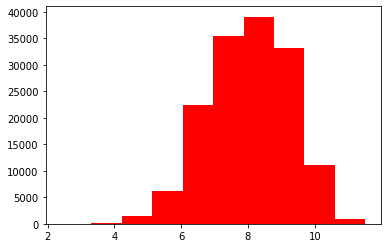

In [18]:
# Normalize or log
plt.hist(np.log(Train_data['price']), orientation = 'vertical',histtype = 'bar', color ='red') 
plt.show()

# ***Unique distribution for each feature***

数据类型
列

1. name - 汽车编码
2. regDate - 汽车注册时间
3. model - 车型编码
4. brand - 品牌
5. bodyType - 车身类型
6. fuelType - 燃油类型
7. gearbox - 变速箱
8. power - 汽车功率
9. kilometer - 汽车行驶公里
10. notRepairedDamage - 汽车有尚未修复的损坏
11. regionCode - 看车地区编码
12. seller - 销售方 【以删】
13. offerType - 报价类型 【以删】
14. creatDate - 广告发布时间
15. price - 汽车价格
16. v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14'【匿名特征，包含v0-14在内15个匿名特征】

In [0]:
Y_train = Train_data['price']

In [0]:
# 这个区别方式适用于没有直接label coding的数据
# 这里不适用，需要人为根据实际含义来区分
# 数字特征
# numeric_features = Train_data.select_dtypes(include=[np.number])
# numeric_features.columns
# # 类型特征
# categorical_features = Train_data.select_dtypes(include=[np.object])
# categorical_features.columns

In [0]:
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]

categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode',]

In [22]:
# categorical feature nunique distribution 
for cat_fea in categorical_features:
    print(cat_fea + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(cat_fea, Test_data[cat_fea].nunique()))
    print(Test_data[cat_fea].value_counts())

name的特征分布如下：
name特征有个37453不同的值
55       97
708      96
387      95
1541     88
713      74
         ..
22270     1
89855     1
42752     1
48899     1
11808     1
Name: name, Length: 37453, dtype: int64
model的特征分布如下：
model特征有个247不同的值
0.0      3896
19.0     3245
4.0      3007
1.0      1981
29.0     1742
         ... 
242.0       1
240.0       1
244.0       1
243.0       1
246.0       1
Name: model, Length: 247, dtype: int64
brand的特征分布如下：
brand特征有个40不同的值
0     10348
4      5763
14     5314
10     4766
1      4532
6      3502
9      2423
5      1569
13     1245
11      919
7       795
3       773
16      771
8       704
25      695
27      650
21      544
15      511
20      450
19      450
12      389
22      363
30      324
17      317
26      303
24      268
28      225
32      193
29      117
31      115
18      106
2       104
37       92
34       77
33       76
36       67
23       62
35       53
38       23
39        2
Name: brand, dtype: int64
bodyType的特征分布如下：
bodyType特征有个8不同的值
0.

In [23]:
#numerical feature unique distribution 
for cat_fea in numeric_features:
    print(cat_fea + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(cat_fea, Train_data[cat_fea].nunique()))
    print(Train_data[cat_fea].value_counts())

power的特征分布如下：
power特征有个566不同的值
0       12829
75       9593
150      6495
60       6374
140      5963
        ...  
1597        1
1596        1
572         1
316         1
575         1
Name: power, Length: 566, dtype: int64
kilometer的特征分布如下：
kilometer特征有个13不同的值
15.0    96877
12.5    15722
10.0     6459
9.0      5257
8.0      4573
7.0      4084
6.0      3725
5.0      3144
4.0      2718
3.0      2501
2.0      2354
0.5      1840
1.0       746
Name: kilometer, dtype: int64
v_0的特征分布如下：
v_0特征有个143997不同的值
45.349115    20
48.087217    16
47.568450    15
48.618150    15
47.840357    15
             ..
44.752849     1
47.710369     1
45.626634     1
43.795918     1
42.340691     1
Name: v_0, Length: 143997, dtype: int64
v_1的特征分布如下：
v_1特征有个143998不同的值
-3.245133    20
 3.183323    16
 1.942732    15
 3.354949    15
 2.796739    15
             ..
 3.418050     1
-2.994782     1
-3.022811     1
-3.220458     1
-3.309574     1
Name: v_1, Length: 143998, dtype: int64
v_2的特征分布如下：
v_2特征有个143997不同的值
-0.3

In [0]:
numeric_features.append('price')

In [25]:
numeric_features

['power',
 'kilometer',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'price']



## ***Correlation analysis***

In [35]:
#输入列表
price_numeric = Train_data[numeric_features]
correlation = price_numeric.corr()
print(correlation['price'].sort_values(ascending=False),'\n')

price        1.000000
v_12         0.692823
v_8          0.685798
v_0          0.628397
power        0.219834
v_5          0.164317
v_2          0.085322
v_6          0.068970
v_1          0.060914
v_14         0.035911
v_13        -0.013993
v_7         -0.053024
v_4         -0.147085
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
kilometer   -0.440519
v_3         -0.730946
Name: price, dtype: float64 



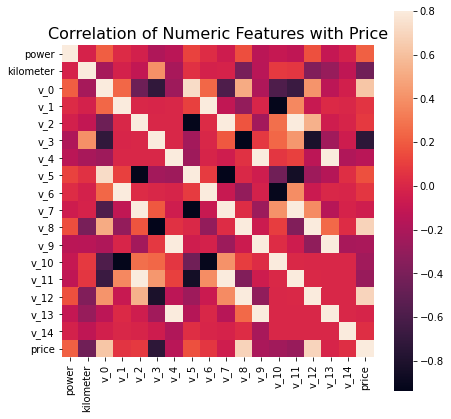

In [36]:
f, ax = plt.subplots(figsize = (7,7))
plt.title('Correlation of Numeric Features with Price',
          y = 1,
          size = 16)
sns.heatmap(correlation,square = True, vmax = 0.8)

In [37]:
del price_numeric['price']
price_numeric.shape

(150000, 17)

## ***特征的偏度和峰值***

In [40]:
for col in numeric_features:
  print(
      '{:15}'.format(col),
      'Skewness: {:05.2f}'.format(Train_data[col].skew()),
      '    ',
      'Kurtosis: {:06.2f}'.format(Train_data[col].kurt())
  )

power           Skewness: 65.86      Kurtosis: 5733.45
kilometer       Skewness: -1.53      Kurtosis: 001.14
v_0             Skewness: -1.32      Kurtosis: 003.99
v_1             Skewness: 00.36      Kurtosis: -01.75
v_2             Skewness: 04.84      Kurtosis: 023.86
v_3             Skewness: 00.11      Kurtosis: -00.42
v_4             Skewness: 00.37      Kurtosis: -00.20
v_5             Skewness: -4.74      Kurtosis: 022.93
v_6             Skewness: 00.37      Kurtosis: -01.74
v_7             Skewness: 05.13      Kurtosis: 025.85
v_8             Skewness: 00.20      Kurtosis: -00.64
v_9             Skewness: 00.42      Kurtosis: -00.32
v_10            Skewness: 00.03      Kurtosis: -00.58
v_11            Skewness: 03.03      Kurtosis: 012.57
v_12            Skewness: 00.37      Kurtosis: 000.27
v_13            Skewness: 00.27      Kurtosis: -00.44
v_14            Skewness: -1.19      Kurtosis: 002.39
price           Skewness: 03.35      Kurtosis: 019.00


## ***每个数字特征分布可视化***

In [43]:
f = pd.melt(Train_data, value_vars=numeric_features)
f

variable   value
0          power    60.0
1          power     0.0
2          power   163.0
3          power   193.0
4          power    68.0
...          ...     ...
2699995    price  5900.0
2699996    price  9500.0
2699997    price  7500.0
2699998    price  4999.0
2699999    price  4700.0

[2700000 rows x 2 columns]

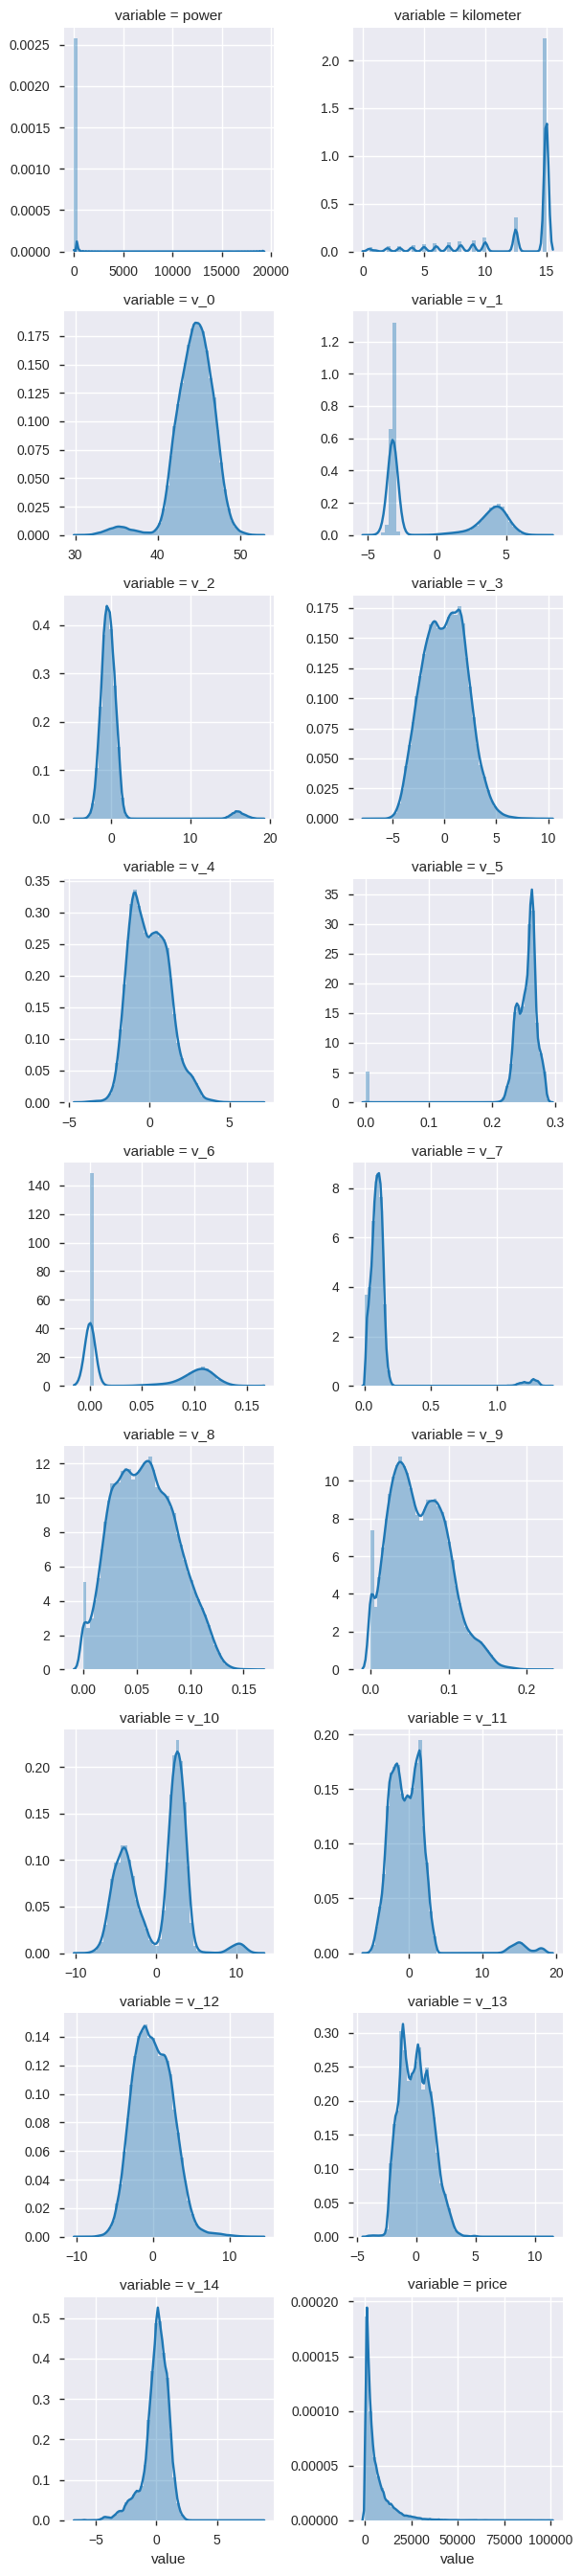

In [46]:
g = sns.FacetGrid(
    f,
    col = 'variable',
    col_wrap = 2,
    sharex = False,
    sharey = False
)
g = g.map(sns.distplot, 'value')
g.add_legend()

匿名特征相对分布均匀

## ***数字特征关系可视化***

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


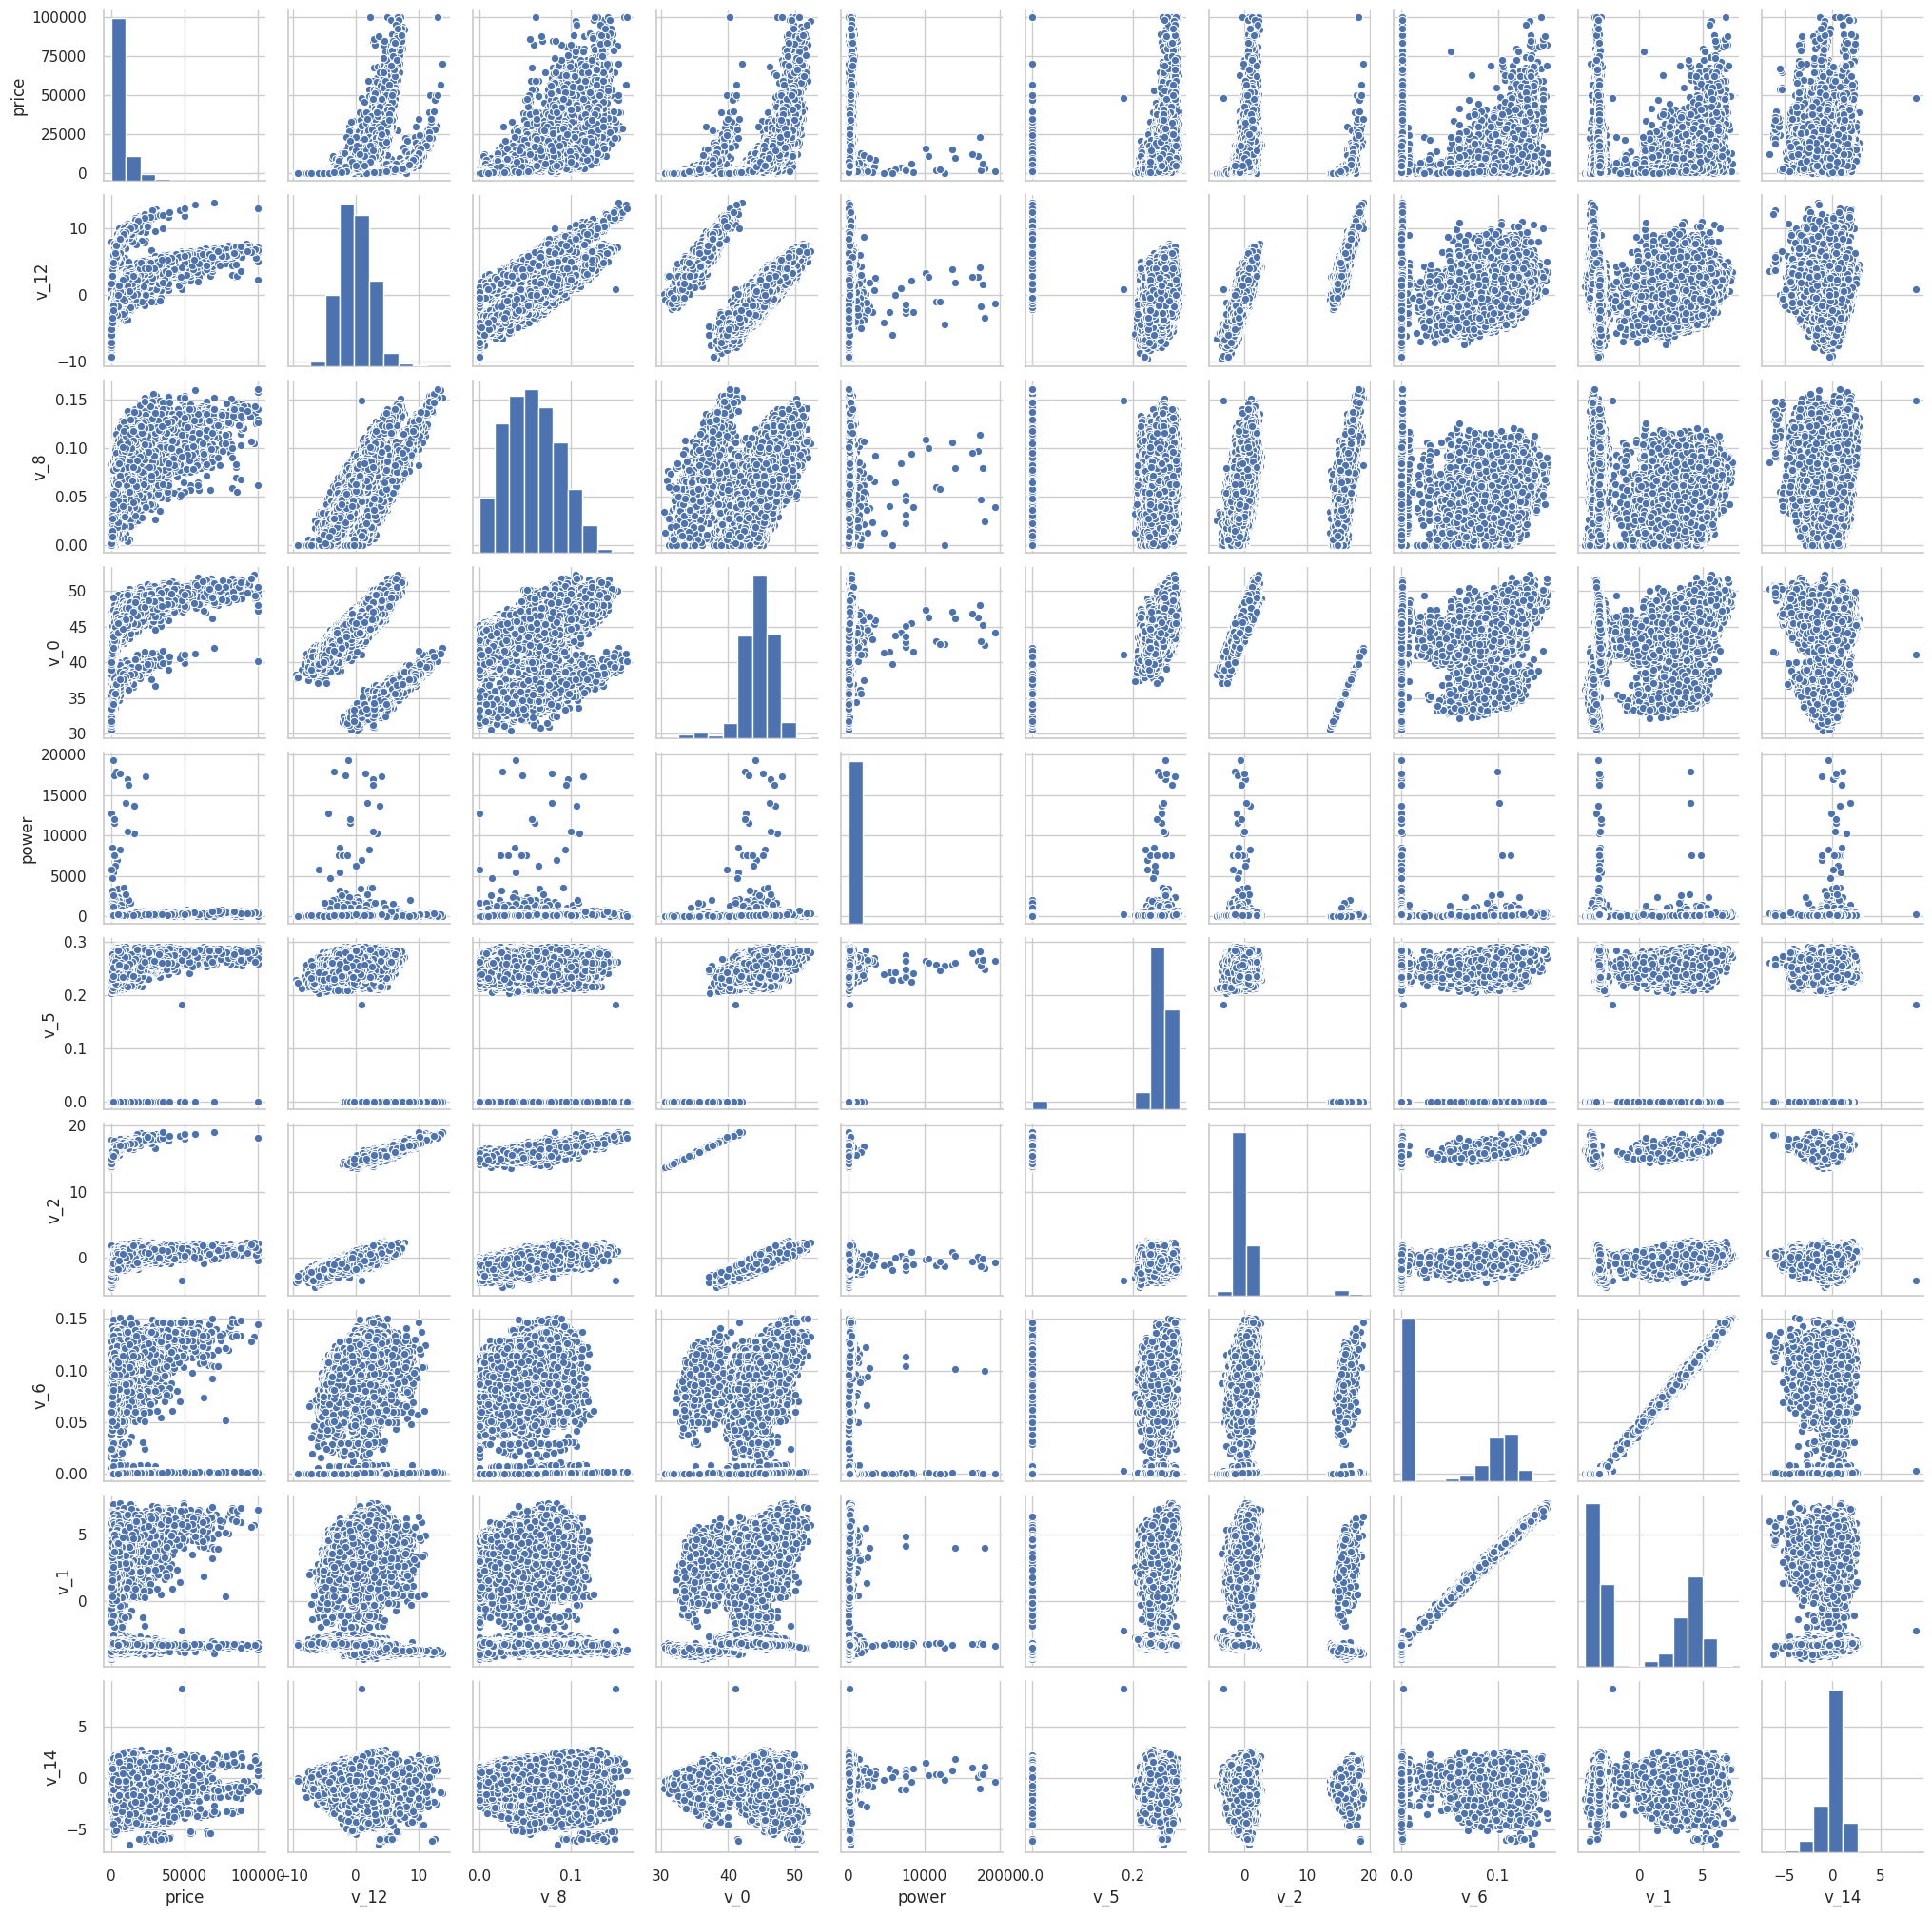

In [49]:
sns.set(style='whitegrid')
columns = ['price', 'v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
sns.pairplot(Train_data[columns],size = 2 ,kind ='scatter')#,diag_kind='kde')
plt.show()

## ***多变量互相回归关系可视化***

此处是多变量之间的关系可视化，可视化更多学习可参考很不错的文章 https://www.jianshu.com/p/6e18d21a4cad¶

In [50]:
Y_train.head()

0    1850
1    3600
2    6222
3    2400
4    5200
Name: price, dtype: int64

In [51]:
Train_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')

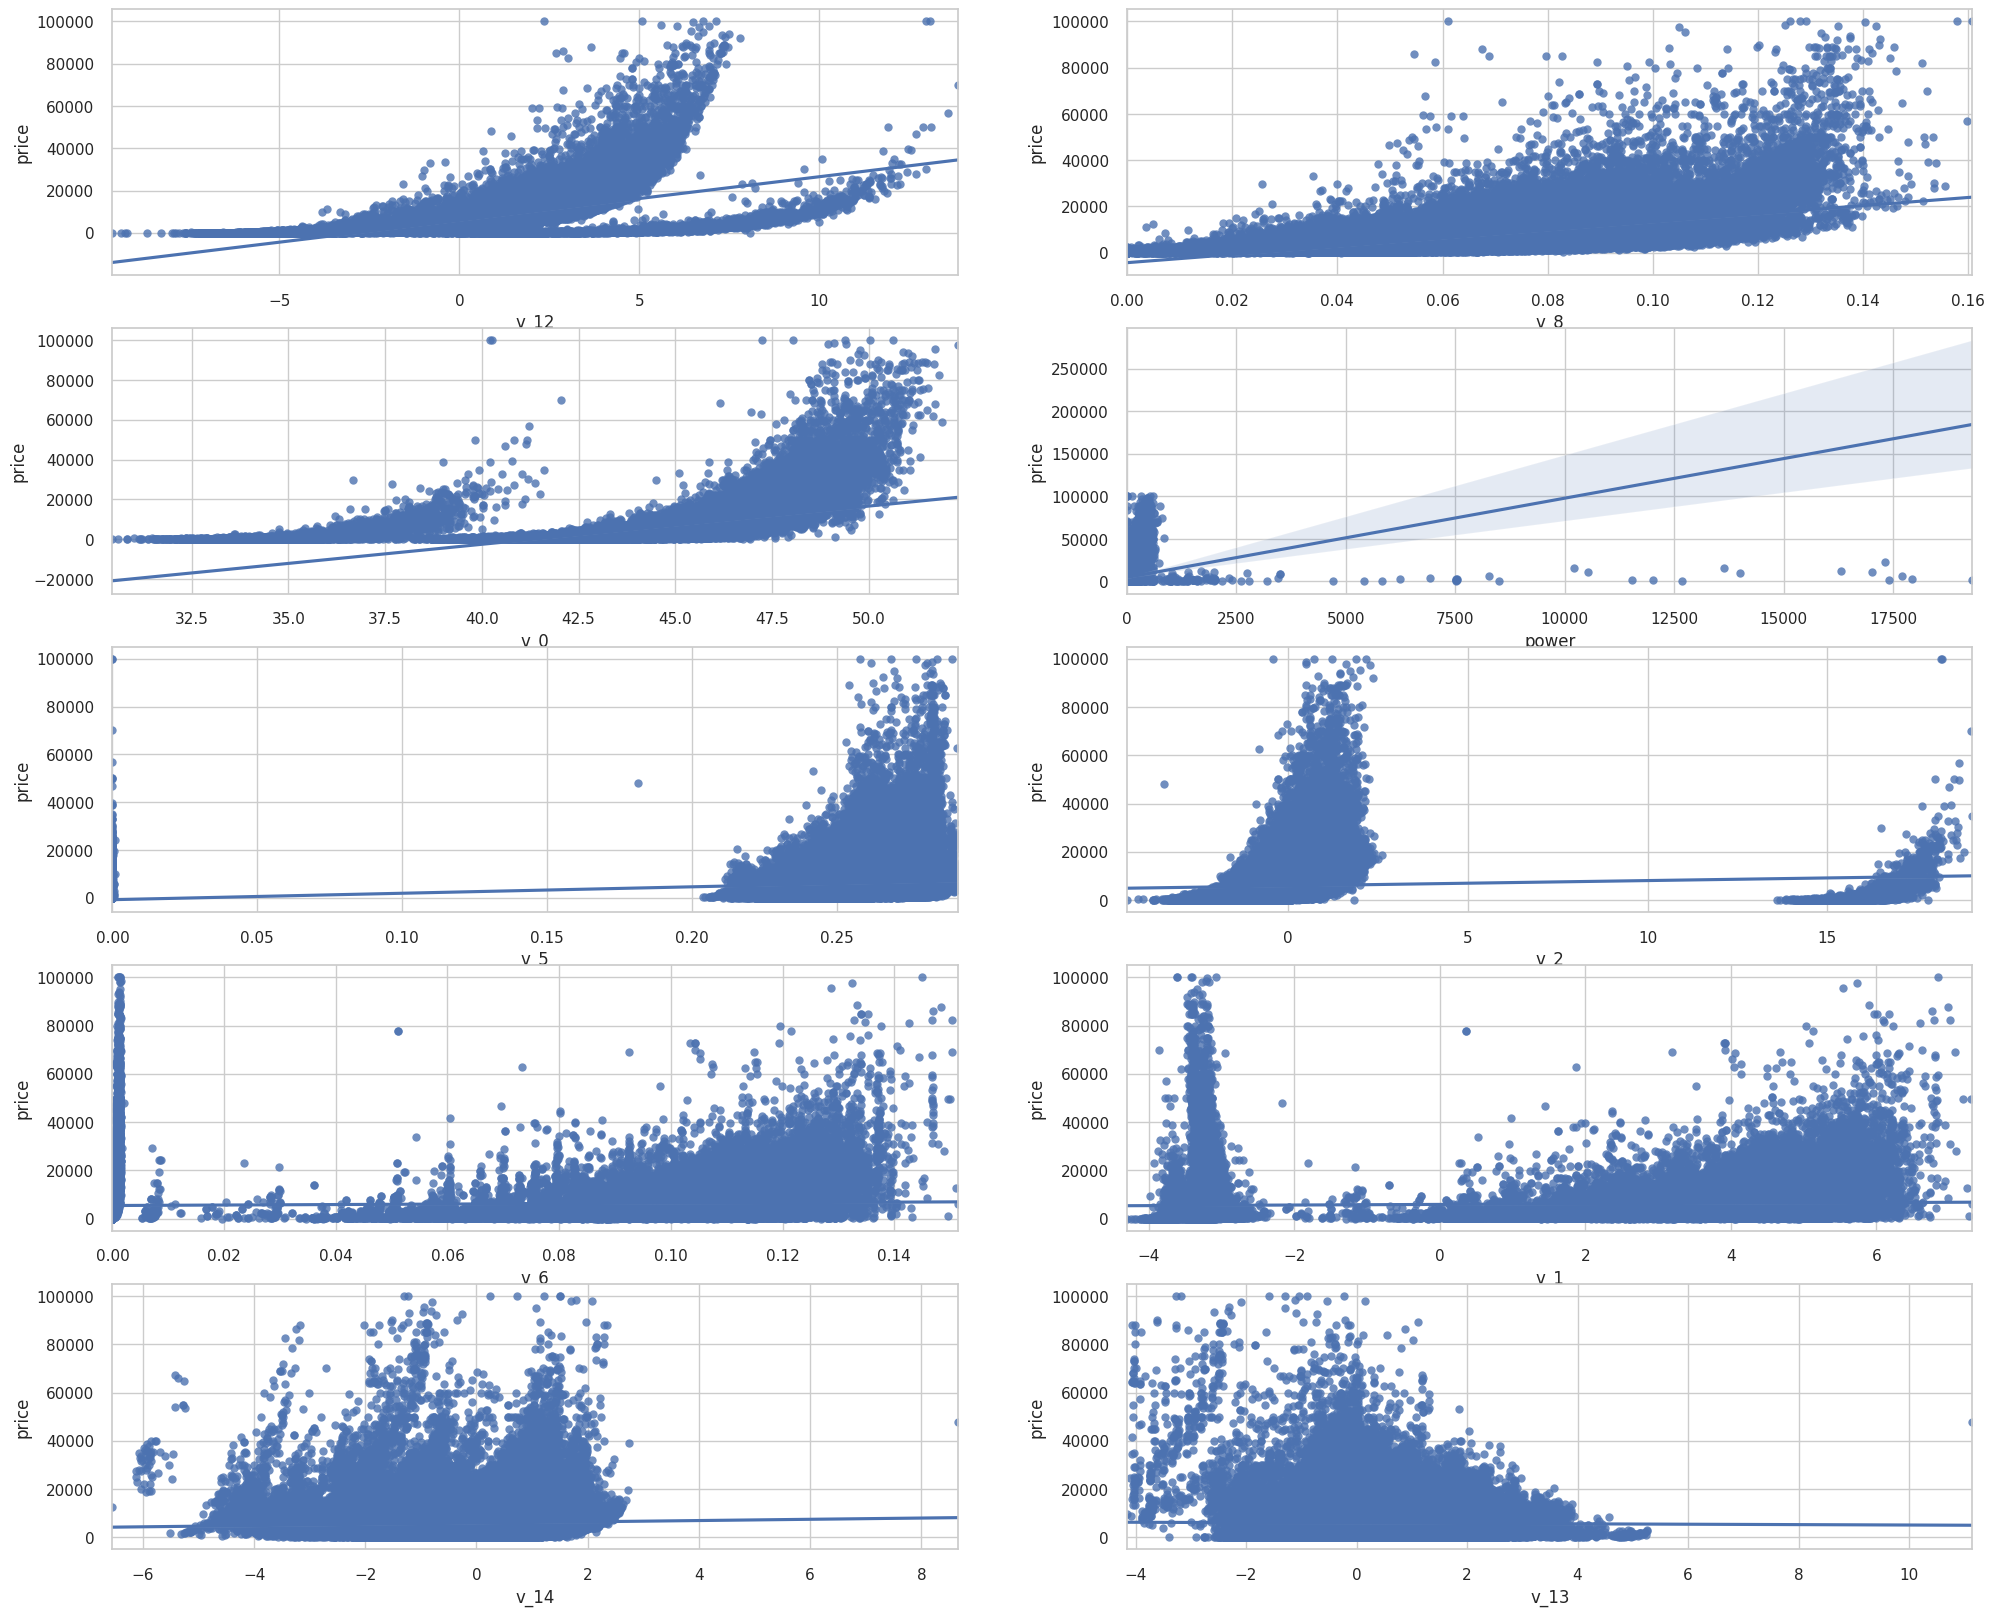

In [52]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(24, 20))
# ['v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
v_12_scatter_plot = pd.concat([Y_train,Train_data['v_12']],axis = 1)
sns.regplot(x='v_12',y = 'price', data = v_12_scatter_plot,scatter= True, fit_reg=True, ax=ax1)

v_8_scatter_plot = pd.concat([Y_train,Train_data['v_8']],axis = 1)
sns.regplot(x='v_8',y = 'price',data = v_8_scatter_plot,scatter= True, fit_reg=True, ax=ax2)

v_0_scatter_plot = pd.concat([Y_train,Train_data['v_0']],axis = 1)
sns.regplot(x='v_0',y = 'price',data = v_0_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

power_scatter_plot = pd.concat([Y_train,Train_data['power']],axis = 1)
sns.regplot(x='power',y = 'price',data = power_scatter_plot,scatter= True, fit_reg=True, ax=ax4)

v_5_scatter_plot = pd.concat([Y_train,Train_data['v_5']],axis = 1)
sns.regplot(x='v_5',y = 'price',data = v_5_scatter_plot,scatter= True, fit_reg=True, ax=ax5)

v_2_scatter_plot = pd.concat([Y_train,Train_data['v_2']],axis = 1)
sns.regplot(x='v_2',y = 'price',data = v_2_scatter_plot,scatter= True, fit_reg=True, ax=ax6)

v_6_scatter_plot = pd.concat([Y_train,Train_data['v_6']],axis = 1)
sns.regplot(x='v_6',y = 'price',data = v_6_scatter_plot,scatter= True, fit_reg=True, ax=ax7)

v_1_scatter_plot = pd.concat([Y_train,Train_data['v_1']],axis = 1)
sns.regplot(x='v_1',y = 'price',data = v_1_scatter_plot,scatter= True, fit_reg=True, ax=ax8)

v_14_scatter_plot = pd.concat([Y_train,Train_data['v_14']],axis = 1)
sns.regplot(x='v_14',y = 'price',data = v_14_scatter_plot,scatter= True, fit_reg=True, ax=ax9)

v_13_scatter_plot = pd.concat([Y_train,Train_data['v_13']],axis = 1)
sns.regplot(x='v_13',y = 'price',data = v_13_scatter_plot,scatter= True, fit_reg=True, ax=ax10)


# ***类别特征分析***

In [60]:
#unique分布
for fea in categorical_features:
  print(
      fea,
      '    ',
      'unique: {}'.format(Train_data[fea].nunique())
  )

name      unique: 99662
model      unique: 248
brand      unique: 40
bodyType      unique: 8
fuelType      unique: 7
gearbox      unique: 2
notRepairedDamage      unique: 2
regionCode      unique: 7905


## ***类别特征箱型图可视化***

In [89]:
#name和regioncode类别太稀疏，只画不稀疏的几种
categorical_features = ['model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage']
for c in categorical_features:
   Train_data[c] = Train_data[c].astype('category') #category类型
   #哪些列存在缺失值（每个c只有一列）
   if Train_data[c].isnull().any():
      #如果需要加之前不存在的值，要先创建cat容器
      Train_data[c] = Train_data[c].cat.add_categories(['Missing'])
      #把所有nan都变为missing这一个category
      Train_data[c] = Train_data[c].fillna('Missing')

#构造数据！！！
f = pd.melt(
    Train_data,
    id_vars = ['price'],
    value_vars = categorical_features
)
f

price           variable value
0        1850              model    30
1        3600              model    40
2        6222              model   115
3        2400              model   109
4        5200              model   110
...       ...                ...   ...
899995   5900  notRepairedDamage   0.0
899996   9500  notRepairedDamage   0.0
899997   7500  notRepairedDamage   0.0
899998   4999  notRepairedDamage   0.0
899999   4700  notRepairedDamage   0.0

[900000 rows x 3 columns]

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


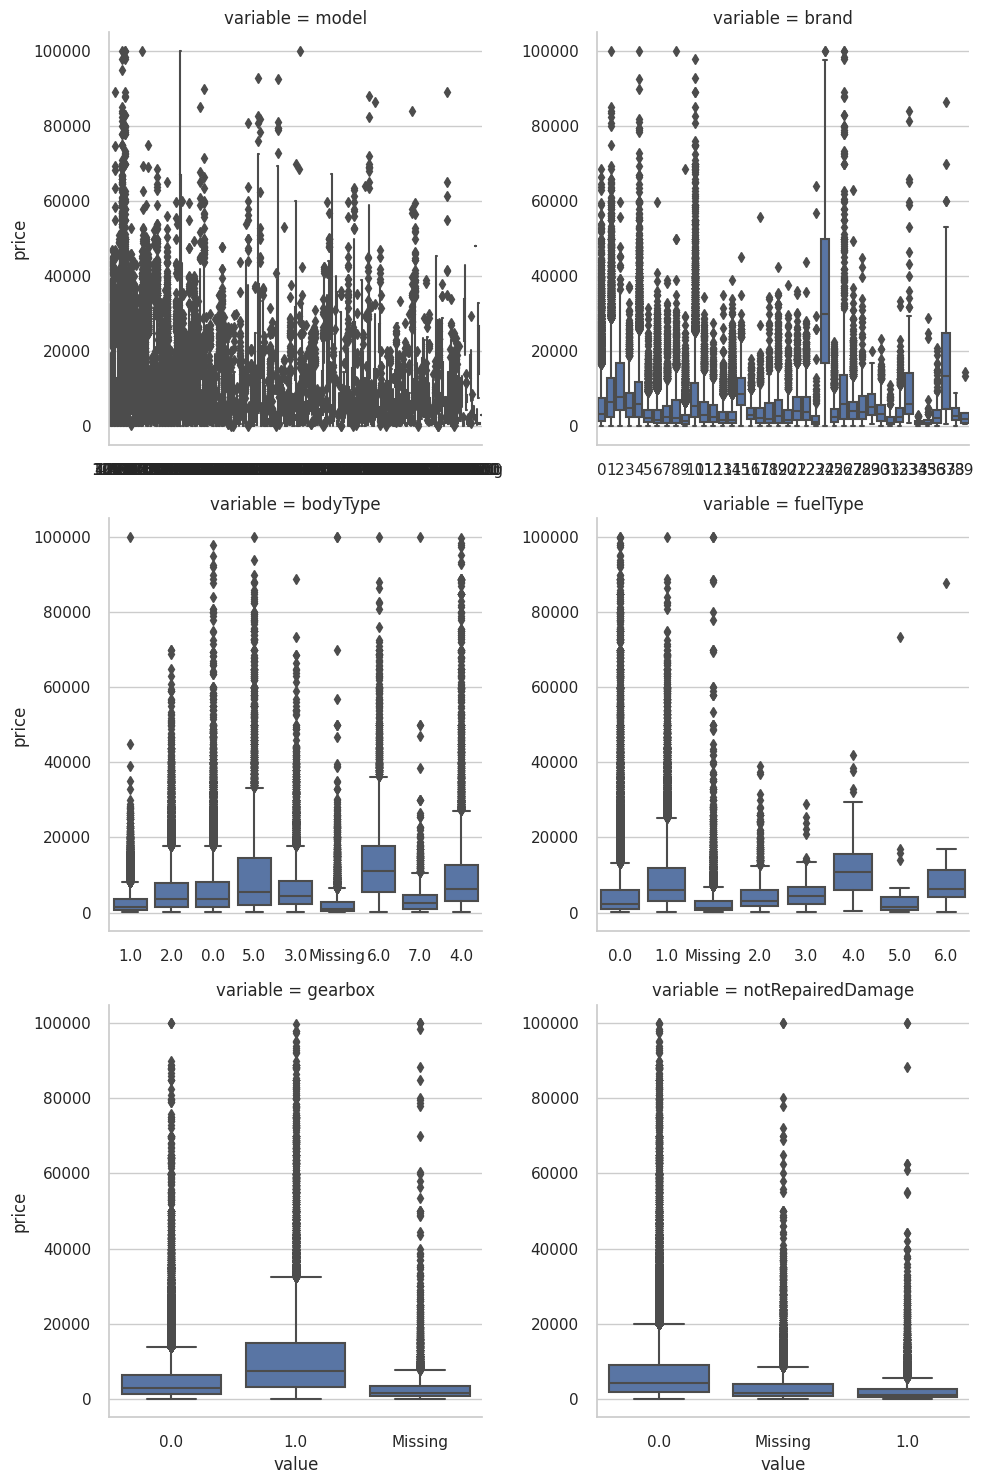

In [116]:
#构造一个可以传入字典的函数
#def boxplot(x, y, **kwargs):
#  sns.boxplot(x = x, y = y)
#  x = plt.xticks(rotation=90)

g = sns.FacetGrid(
    f,
    col = 'variable',
    col_wrap = 2,
    sharex = False,
    sharey = False,
    size = 5
)
g.map(sns.boxplot, 'value', 'price')

In [94]:
Train_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')

## ***类别特征小提琴图可视化***

In [95]:
categorical_features

['model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage']

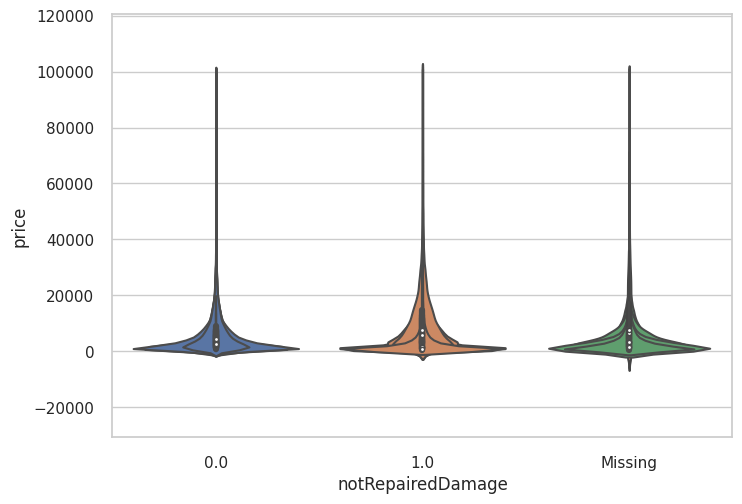

In [100]:
catg_list = categorical_features
target = 'price'
for catg in catg_list:
  sns.violinplot(x = catg, y = target, data = Train_data)
  plt.show()


## ***类别特征的柱形图可视化***

In [102]:
#def bar_plot(x, y, **kwargs):
#    sns.barplot(x=x, y=y)
#    x=plt.xticks(rotation=90)

f = pd.melt(Train_data, id_vars = ['price'], value_vars=categorical_features)
f

price           variable value
0        1850              model    30
1        3600              model    40
2        6222              model   115
3        2400              model   109
4        5200              model   110
...       ...                ...   ...
899995   5900  notRepairedDamage   0.0
899996   9500  notRepairedDamage   0.0
899997   7500  notRepairedDamage   0.0
899998   4999  notRepairedDamage   0.0
899999   4700  notRepairedDamage   0.0

[900000 rows x 3 columns]

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


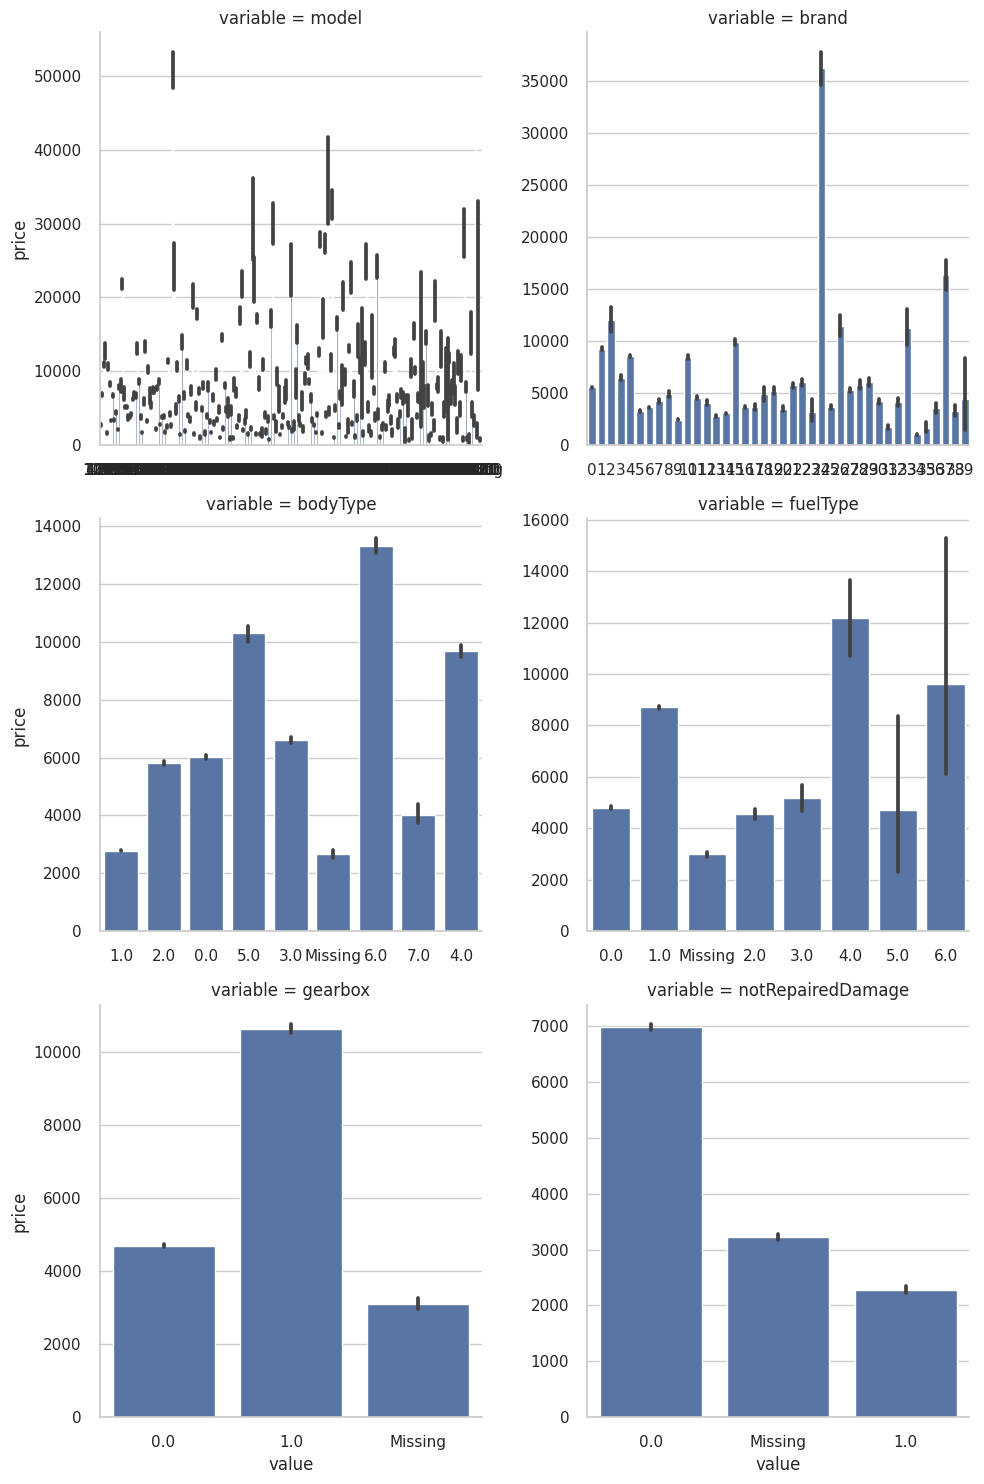

In [115]:
#先定义函数
#def bar_plot(x, y, **kwargs):
#    sns.barplot(x=x, y=y)
#    x=plt.xticks(rotation=90)

g = sns.FacetGrid(
    f,
    col = 'variable',
    col_wrap = 2,
    sharex = False,
    sharey = False,
    size = 5
)
#之所以不直接在map里面用barplot是因为没有这个函数
g = g.map(sns.barplot,'value', 'price')
#g = g.map(bar_plot, 'value','price')

## ***类别特征的每个类别频数可视化***

In [117]:
##  5) 类别特征的每个类别频数可视化(count_plot)
def count_plot(x,  **kwargs):
    sns.countplot(x=x)
    x=plt.xticks(rotation=90)
#注意 没有id_var=price
f = pd.melt(Train_data,  value_vars=categorical_features)
f


variable value
0                   model    30
1                   model    40
2                   model   115
3                   model   109
4                   model   110
...                   ...   ...
899995  notRepairedDamage   0.0
899996  notRepairedDamage   0.0
899997  notRepairedDamage   0.0
899998  notRepairedDamage   0.0
899999  notRepairedDamage   0.0

[900000 rows x 2 columns]

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


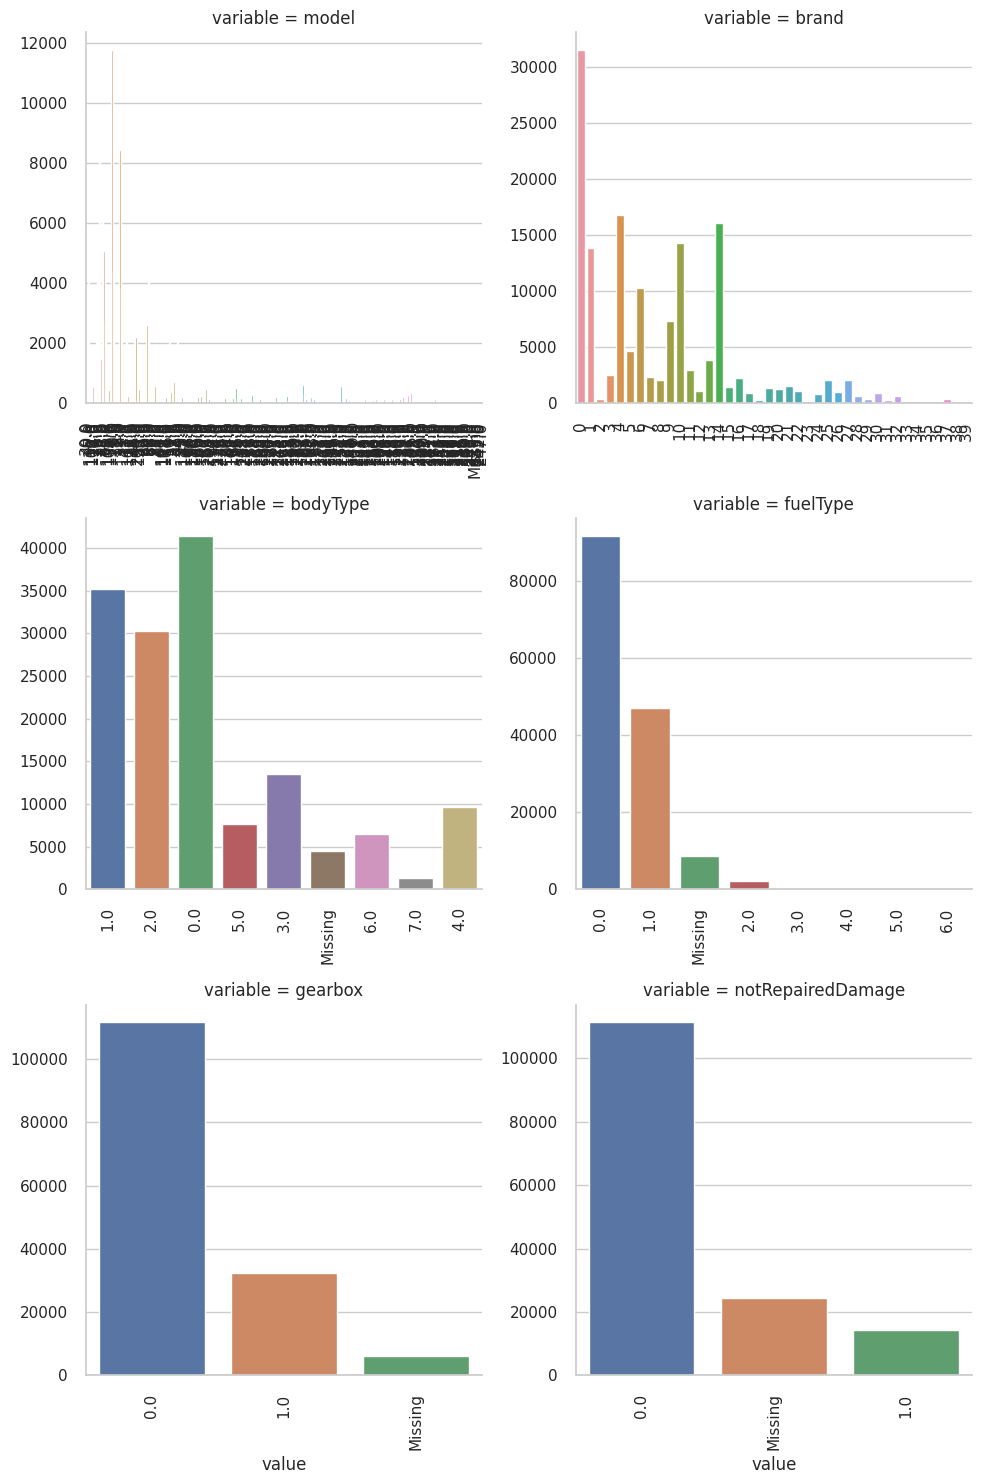

In [118]:
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(count_plot, "value")